In [1]:
## Import modules
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D

In [16]:
data = pd.read_csv("loan_use/loan_data.csv")
print("- Data has {} rows and {} columns.".format(*data.shape))
print("- Column names: ", list(data.columns))

- Data has 19755 rows and 27 columns.
- Column names:  ['AGE', 'TOT_LOAN', 'TOT_LOAN_CRD', 'LOAN_BNK', 'LOAN_CPT', 'CRDT_CNT', 'GUARN_CNT', 'INCOME', 'LOAN_CRD_CNT', 'LATE_RATE', 'LATE_RATE_1Y', 'INS_MON_MAX', 'CANCEL_CNT_1Y', 'CALL_TIME', 'TEL_COST_MON', 'MOBILE_PRICE', 'SUSP_DAY', 'LATE_TEL', 'COMB_COMM', 'SEX', 'PAY_METHOD_B', 'PAY_METHOD_C', 'PAY_METHOD_D', 'JOB_B', 'JOB_C', 'JOB_D', 'TARGET']


In [23]:
X = data.drop(['TARGET'], axis=1)
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3)

In [24]:
X.head(5)

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,SUSP_DAY,LATE_TEL,COMB_COMM,SEX,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_B,JOB_C,JOB_D
0,40,6,6,6,0,0,0,4500,0,16,...,0,120,0,1,0,0,0,0,0,0
1,35,9,9,0,0,1,0,3700,0,9,...,0,0,0,1,0,1,0,1,0,0
2,55,42,0,42,0,5,0,8900,0,13,...,0,0,0,1,1,0,0,0,1,0
3,45,141,18,105,33,7,0,0,0,11,...,0,0,1,1,1,0,0,1,0,0
4,35,123,123,0,0,3,0,3900,0,0,...,0,0,1,0,0,1,0,0,1,0


In [25]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\HQ\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HQ\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\HQ\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
pca = PCA(n_components=None)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
Z_train = pca.transform(X_train)
print("- Shape of transformed data: ", Z_train.shape)

Z_test = pca.transform(X_test)
print("- Shape of transformed data: ", Z_test.shape)

- Shape of transformed data:  (13828, 26)
- Shape of transformed data:  (5927, 26)


In [29]:
num_components = pca.n_components_
exp_var = pca.explained_variance_ratio_
cum_exp_var = np.cumsum(exp_var)

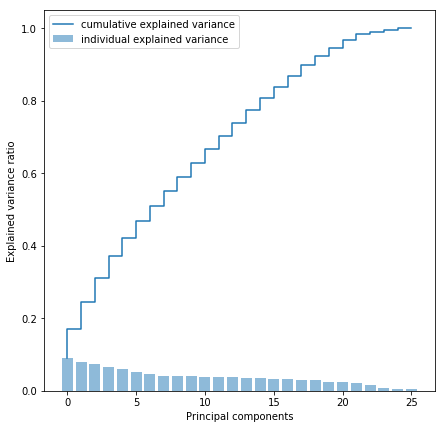

In [30]:
plt.figure(num=1, figsize=(7, 7))
plt.bar(range(num_components), exp_var, alpha=0.5, label='individual explained variance')
plt.step(range(num_components), cum_exp_var, label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

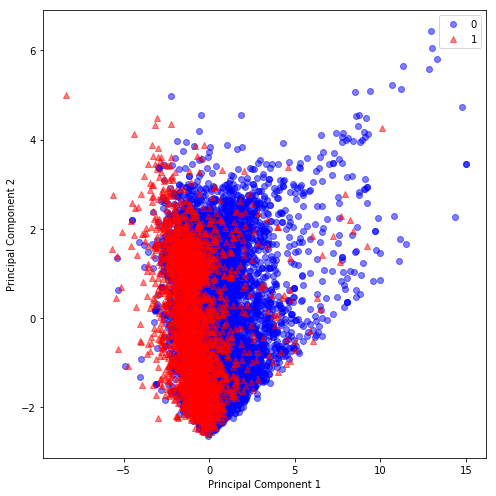

In [32]:
plt.figure(num=2, figsize=(7, 7))
for label, color, marker in zip((0, 1), ('blue', 'red'), ('o', '^')):
    plt.scatter(Z_train[y_train == label, 0], Z_train[y_train == label, 1],
                label=label, color=color, marker=marker, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

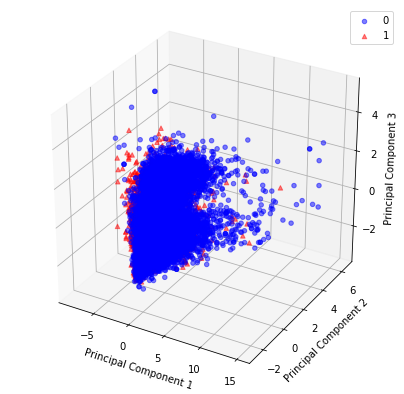

In [33]:
fig = plt.figure(num=3, figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
for label, color, marker in zip((0, 1), ('blue', 'red'), ('o', '^')):
    ax.scatter(Z_train[y_train == label, 0], Z_train[y_train == label, 1],
               Z_train[y_train == label, 2], label=label, color=color,
               marker=marker, alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(loc='best')
plt.show(fig)

In [42]:
Z_sub_train = pd.DataFrame(Z_train[:,:15])
Z_sub_test = pd.DataFrame(Z_test[:,:15])

In [43]:
## Build LR model 
log_Z = LogisticRegression()
log_Z.fit(Z_sub_train, y_train)

C:\Users\HQ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

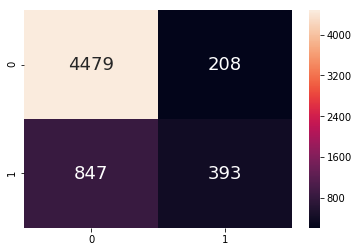

In [44]:
## Predict & calculate score 
pred_score_Z = log_Z.score(Z_sub_test, y_test)
pred_Z = log_Z.predict(Z_sub_test)

cm_test = confusion_matrix(y_test, pred_Z)
cm_test = pd.DataFrame(cm_test, columns=[0, 1])
sns.heatmap(data=cm_test,fmt='g', annot=True, annot_kws={'size': 18})

In [45]:
log_ori = LogisticRegression()
log_ori.fit(X_train, y_train)

C:\Users\HQ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

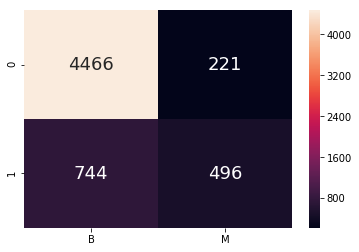

In [46]:
pred_score_ori = log_ori.score(X_test, y_test)
pred_ori = log_ori.predict(X_test)
confusion_matrix(y_test, pred_ori)

cm_test = confusion_matrix(y_test, pred_ori)
cm_test = pd.DataFrame(cm_test, columns=['B', 'M'])
sns.heatmap(data=cm_test,fmt='g', annot=True, annot_kws={'size': 18})